# OvR and OvO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # [:, :2]使用前两个维度,为了可视化
y = iris.target # 3分类

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train) # multi_class = "ovr"，默认支持多分类

LogisticRegression(multi_class='ovr')

In [5]:
log_reg.score(X_test, y_test)

0.7894736842105263

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)


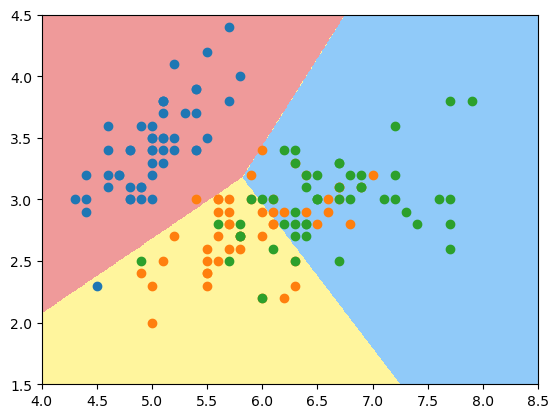

In [7]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

In [8]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg") # ovo
log_reg2.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [9]:
log_reg2.score(X_test, y_test)

0.7894736842105263

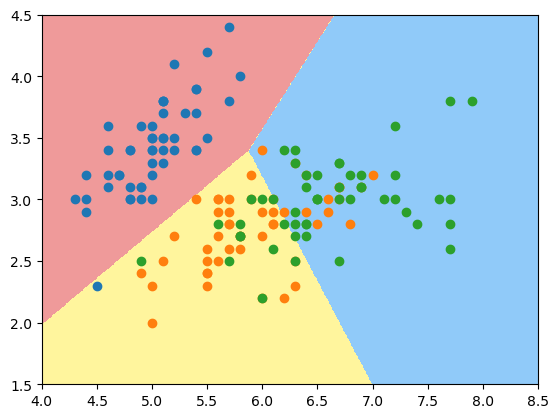

In [10]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.show()

## 使用所有的数据

In [11]:
iris = datasets.load_iris()
X = iris.data# [:, :2]使用前两个维度,为了可视化
y = iris.target # 3分类
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [12]:
log_reg = LogisticRegression(multi_class="ovr")
log_reg.fit(X_train, y_train) # multi_class = "ovr"，默认支持多分类
print(log_reg.score(X_test, y_test))

0.9736842105263158


In [13]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg") # ovo
log_reg2.fit(X_train, y_train) # multi_class = "ovr"，默认支持多分类
log_reg2.score(X_test, y_test)

1.0

# Pure OvO and OvR

In [14]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9736842105263158

In [15]:
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0